# Set-up


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random as rd
import scipy.stats as stats
from scipy.stats import chi
import warnings
warnings.filterwarnings("ignore")
np.random.seed(160423)

In [52]:
df = pd.read_csv("crash_info_general.csv")
df2 = pd.read_csv("crash_info_flag_variables.csv")
df3 = pd.read_csv("crash_info_vehicles.csv")

We want to investigate if there is a correlation between the impairment of the driver to the severity of the crash. This would be done by measuring the `DAMAGE_INDICATOR` from `crash_info_vehicles.csv`

We have 101 variables and we will remove duplicated observations, but we want to select data from crash_info_general.csv that are relavant to the question. Such as : `CRN`, `SECONDARY_CRASH`. `CRN` is the primary key and we will also remove `TRUE` values for secondary crash as including them will be considered double counting. 

## Data exploration and cleaning

In [53]:
df2.head()

,AGGRESSIVE_DRIVING,ALCOHOL_RELATED,ANGLE_CRASH,ATV,BACKUP_CONGESTION,BACKUP_NONRECURRING,BACKUP_PRIOR,BICYCLE,CELL_PHONE,COMM_VEHICLE,...,UNSIGNALIZED_INT,URBAN,VEHICLE_FAILURE,VEHICLE_TOWED,WET_ROAD,WORK_ZONE,CHILD_PASSENGER,MATURE_DRIVER,YOUNG_DRIVER,RAMP
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1


In [54]:
print("(observations, variables)  = " , df2.shape)

(observations, variables)  =  (133013, 111)


In [55]:
df.head()

,Unnamed: 0,CRN,ARRIVAL_TM,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,...,WZ_MOVING,WZ_OTHER,WZ_SHLDER_MDN,ROADWAY_CLEARED,WEATHER1,WEATHER2,WZ_WORKERS_INJ_KILLED,SECONDARY_CRASH,INTERSECTION_RELATED,fips
0,1,2010001139,2229.0,2,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,4.209120e+11
1,2,2010004457,658.0,2,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,4.210104e+11
2,3,2010005005,1217.0,2,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,4.210104e+11
3,4,2010005037,648.0,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
4,5,2010005373,36.0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,4.210198e+11


In [56]:
print("(observations, variables)  = " , df.shape)

(observations, variables)  =  (133013, 101)


###### There are equal number of observations, which likely means that the observations between the 2 files match

In [57]:
df_merge = pd.merge(df, df2, on = "CRN")
print("(observations, variables)  = " , df_merge.shape)

(observations, variables)  =  (133013, 211)


Here we can see that every observation is preserved. This means that each recorded crash has their respective flag observation

In [58]:
df3.head()

,AVOID_MAN_CD,BODY_TYPE,COMM_VEH,CRN,DAMAGE_IND,DVR_PRES_IND,EMERG_VEH_USE_CD,GRADE,IMPACT_POINT,INS_IND,...,UNIT_NUM,UNIT_TYPE,VEH_COLOR_CD,VEH_MOVEMENT,VEH_POSITION,VEH_REG_STATE,VEH_ROLE,VEH_TYPE,PARTIAL_VIN,VINA_BODY_TYPE_CD
0,NaN,41.0,N,2012032721,3.0,1.0,NaN,1.0,12.0,Y,...,1,1,4.0,17.0,1.0,PA,1.0,4.0,2FMZA514XYB,TES
1,NaN,4.0,N,2012032734,1.0,1.0,NaN,1.0,12.0,Y,...,1,1,7.0,12.0,3.0,PA,1.0,1.0,3N1AB6AP9CL,P4D
2,NaN,5.0,N,2012031602,3.0,1.0,NaN,1.0,2.0,Y,...,1,1,2.0,15.0,3.0,NJ,1.0,1.0,KL1TD66608B,P5D
3,NaN,4.0,N,2012024286,3.0,1.0,NaN,1.0,12.0,Y,...,1,1,7.0,1.0,1.0,PA,1.0,1.0,1NXBR32E74Z,P4D
4,NaN,4.0,N,2012026855,3.0,1.0,NaN,1.0,7.0,Y,...,1,1,5.0,1.0,3.0,PA,1.0,1.0,1G6DM577840,P4D


In [59]:
print("(observations, variables)  = " , df3.shape)

(observations, variables)  =  (284487, 31)


We see that there are only 18777 observations, indicating that not all of the crashes are recorded in this file

In [60]:
df_merge

,Unnamed: 0,CRN,ARRIVAL_TM,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,...,UNSIGNALIZED_INT,URBAN,VEHICLE_FAILURE,VEHICLE_TOWED,WET_ROAD,WORK_ZONE,CHILD_PASSENGER,MATURE_DRIVER,YOUNG_DRIVER,RAMP
0,1,2010001139,2229.0,2,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,2,2010004457,658.0,2,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,0
2,3,2010005005,1217.0,2,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,4,2010005037,648.0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
4,5,2010005373,36.0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133008,133009,2022041832,NaN,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
133009,133010,2022043790,0.0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
133010,133011,2022047157,1000.0,2,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
133011,133012,2022055468,NaN,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


Now we will do an inner_join between df3 and df_merge. This will remove many observations that do not have matching CRN key

In [61]:
df_merge_2 = pd.merge(df_merge, df3, on = "CRN", how = "inner")
print("(observations, variables)  = " , df_merge_2.shape)

(observations, variables)  =  (284487, 241)


We will now perform some cleaning by removing `SECONDARY_CRASH` and `DEER_RELATED` as they interfere with the data or they are irrelevant. Afterwards, we will remove missing or unknown damage indicators

In [62]:
df_merge_2["SECONDARY_CRASH"] = df_merge_2["SECONDARY_CRASH"].fillna("N")
df_merge_2["DAMAGE_IND"] = df_merge_2["DAMAGE_IND"].fillna(9)
df_clean = (
    df_merge_2
    .query("DEER_RELATED == 0")
    .query("SECONDARY_CRASH == 'N'")
    .query("DAMAGE_IND != 9")
)
df_clean

,Unnamed: 0,CRN,ARRIVAL_TM,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,...,UNIT_NUM,UNIT_TYPE,VEH_COLOR_CD,VEH_MOVEMENT,VEH_POSITION,VEH_REG_STATE,VEH_ROLE,VEH_TYPE,PARTIAL_VIN,VINA_BODY_TYPE_CD
0,1,2010001139,2229.0,2,0,0,0,0,0,0,...,1,1,5.0,1.0,3.0,PA,1.0,4.0,1D7HW42N35S,TPC
1,1,2010001139,2229.0,2,0,0,0,0,0,0,...,2,1,7.0,3.0,3.0,PA,3.0,6.0,1GYDE637440,PUT
2,1,2010001139,2229.0,2,0,0,0,0,0,0,...,3,1,7.0,3.0,3.0,PA,3.0,1.0,WBABN53431J,PCP
3,1,2010001139,2229.0,2,0,0,0,0,0,0,...,4,1,4.0,3.0,3.0,PA,2.0,1.0,2C3HD56F6TH,P4D
4,2,2010004457,658.0,2,0,0,0,0,0,0,...,3,1,8.0,1.0,6.0,PA,1.0,6.0,1GNFK13017R,PUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284480,133011,2022047157,1000.0,2,0,0,0,0,0,0,...,2,3,3.0,6.0,1.0,MD,3.0,5.0,99999999999,NaN
284481,133011,2022047157,1000.0,2,0,0,0,0,0,0,...,1,1,1.0,1.0,1.0,PA,1.0,1.0,2HGFC2F80LH,P
284484,133013,2022066210,1541.0,0,0,0,0,0,0,0,...,1,1,7.0,1.0,6.0,PA,1.0,6.0,1GNKVFED7CJ,T4W
284485,133013,2022066210,1541.0,0,0,0,0,0,0,0,...,3,2,12.0,6.0,1.0,PA,2.0,6.0,KNMAT2MV9JP,T


We now have 230825 observations with vehicle damage indicators

In [63]:
df_clean_impair = df_clean.drop_duplicates()[["DRINKING_DRIVER", "DRUGGED_DRIVER", "FATIGUE_ASLEEP","DAMAGE_IND"]]
df_clean_impair2 = (
    df_clean_impair
    .assign(IMPAIRED = lambda x: x.DRINKING_DRIVER + x.DRUGGED_DRIVER + x.FATIGUE_ASLEEP)
)



In [64]:
df_clean_impair_check = df_clean_impair2[df_clean_impair2["IMPAIRED"] >= 2 ]
df_clean_impair_check 

,DRINKING_DRIVER,DRUGGED_DRIVER,FATIGUE_ASLEEP,DAMAGE_IND,IMPAIRED
254,1,1,0,3.0,2
260,1,1,0,3.0,2
306,1,1,0,3.0,2
504,1,1,0,3.0,2
593,1,1,0,3.0,2
...,...,...,...,...,...
284176,1,1,0,3.0,2
284218,1,1,0,3.0,2
284219,1,1,0,3.0,2
284284,1,1,0,2.0,2


We have 2935 observations of drivers with a combination of the three impairment

In [65]:
df_clean_not_impaired = (
    df_clean_impair2
    .query("IMPAIRED == 0")
    .assign(IS_IMPAIRED = False)
)
df_clean_not_impaired

,DRINKING_DRIVER,DRUGGED_DRIVER,FATIGUE_ASLEEP,DAMAGE_IND,IMPAIRED,IS_IMPAIRED
0,0,0,0,3.0,0,False
1,0,0,0,3.0,0,False
2,0,0,0,2.0,0,False
3,0,0,0,1.0,0,False
4,0,0,0,2.0,0,False
...,...,...,...,...,...,...
284480,0,0,0,2.0,0,False
284481,0,0,0,3.0,0,False
284484,0,0,0,3.0,0,False
284485,0,0,0,2.0,0,False


In [66]:
df_clean_impaired = (
    df_clean_impair2
    .query("IMPAIRED != 0")
    .assign(IS_IMPAIRED = True)
)
df_clean_impaired

,DRINKING_DRIVER,DRUGGED_DRIVER,FATIGUE_ASLEEP,DAMAGE_IND,IMPAIRED,IS_IMPAIRED
71,0,0,1,3.0,1,True
72,0,0,1,1.0,1,True
89,1,0,0,2.0,1,True
90,1,0,0,3.0,1,True
91,1,0,0,3.0,1,True
...,...,...,...,...,...,...
284368,1,1,0,3.0,2,True
284377,1,0,0,1.0,1,True
284378,1,0,0,1.0,1,True
284379,1,0,0,1.0,1,True


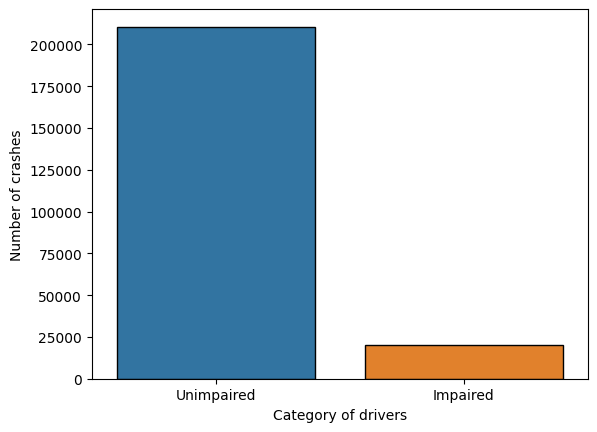

In [67]:
sb.barplot(x = ["Unimpaired", "Impaired"], y = [df_clean_not_impaired.shape[0], df_clean_impaired.shape[0]], edgecolor = "black")
sb.color_palette("hls", 8)
plt.ylabel("Number of crashes")
plt.xlabel("Category of drivers")
plt.show()

Now among the impaired, we would like to see the what category do they fall under

In [68]:
df_impaired_group = df_clean_impaired.groupby(["DRINKING_DRIVER", "DRUGGED_DRIVER", "FATIGUE_ASLEEP"]).count()
df_impaired_ungroup = df_impaired_group.reset_index()
df_impaired_ungroup = df_impaired_ungroup.sort_values(["DRINKING_DRIVER", "DRUGGED_DRIVER", "FATIGUE_ASLEEP"])
df_impaired_ungroup.loc[[2, 3]] = df_impaired_ungroup.loc[[3, 2]].values

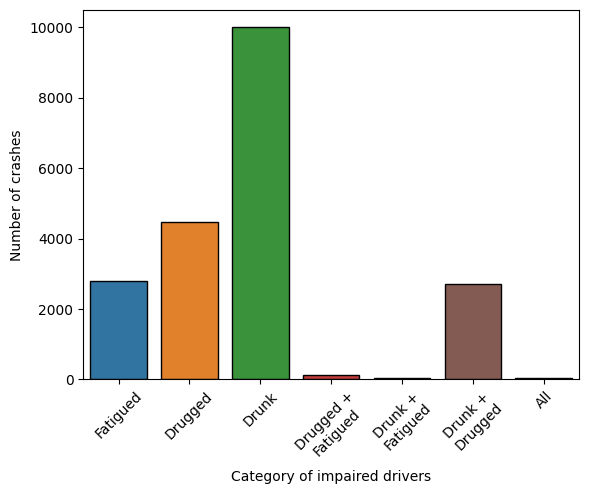

In [69]:
x_ = ["Fatigued", "Drugged", "Drunk", "Drugged +\nFatigued", "Drunk +\nFatigued", "Drunk +\nDrugged", "All"]
y_ = df_impaired_ungroup["IMPAIRED"]
sb.barplot(x = x_, y = y_, edgecolor = "black")
plt.xticks(rotation=45)
plt.ylabel("Number of crashes")
plt.xlabel("Category of impaired drivers")
plt.show()

It seems that among the impairments, being drunk is the most common and it is followed by being drugged then fatigued is tied with being drunk and drugged.

## Cleaning and sampling

Notice that ratio of unimpaired drivers to impaired drivers is about 10:1. Now we will perform an undersample on the unimpaired drivers so that the data is not skewed.

In [70]:
number_not_impaired_divide_10 = df_clean_not_impaired.shape[0] // 10
number_not_impaired_divide_10
random_numbers = np.random.choice(df_clean_not_impaired.shape[0], number_not_impaired_divide_10, replace = False) # generates random number from the size of non-impaired vectors without repeats
df_clean_not_impaired_sampled = df_clean_not_impaired.iloc[random_numbers] # Slice the observations

Now we check the size of unimpaired vs impaired again and now we see that it is now roughly the same size

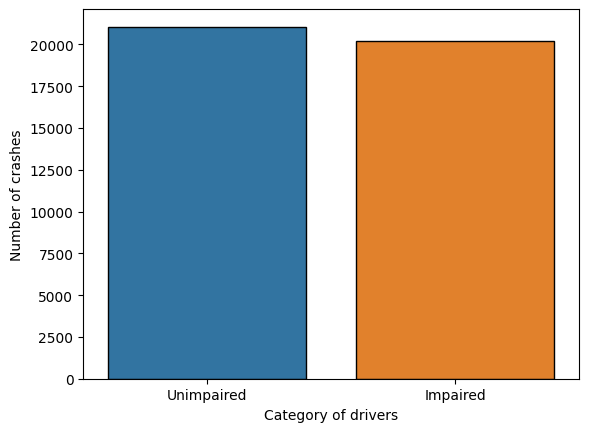

In [71]:
sb.barplot(x = ["Unimpaired", "Impaired"], y = [df_clean_not_impaired_sampled.shape[0], df_clean_impaired.shape[0]], edgecolor = "black")
sb.color_palette("hls", 8)
plt.ylabel("Number of crashes")
plt.xlabel("Category of drivers")
plt.show()

We will assign the damage indicator numbers to their respective categories

In [72]:
combined_cleaned = pd.concat([df_clean_not_impaired_sampled, df_clean_impaired])
combined_cleaned = (
    combined_cleaned.replace({"DAMAGE_IND" : {0 : "NONE", 1 : "MINOR", 2 : "MODERATE", 3 : "SEVERE"}})  
)
combined_cleaned

,DRINKING_DRIVER,DRUGGED_DRIVER,FATIGUE_ASLEEP,DAMAGE_IND,IMPAIRED,IS_IMPAIRED
216350,0,0,0,SEVERE,0,False
203779,0,0,0,SEVERE,0,False
100778,0,0,0,MINOR,0,False
46278,0,0,0,SEVERE,0,False
242191,0,0,0,MINOR,0,False
...,...,...,...,...,...,...
284368,1,1,0,SEVERE,2,True
284377,1,0,0,MINOR,1,True
284378,1,0,0,MINOR,1,True
284379,1,0,0,MINOR,1,True


In [73]:
correlation = (
    combined_cleaned
    .groupby(["DAMAGE_IND", "IS_IMPAIRED"])
    .count()
    .reset_index()
    .assign(COUNT = lambda x: x.DRINKING_DRIVER)
    .sort_values(["COUNT"])
)[["DAMAGE_IND", "IS_IMPAIRED", "COUNT"]]
correlation

,DAMAGE_IND,IS_IMPAIRED,COUNT
5,NONE,True,259
4,NONE,False,1448
1,MINOR,True,3627
0,MINOR,False,4317
3,MODERATE,True,4543
2,MODERATE,False,4880
6,SEVERE,False,10417
7,SEVERE,True,11772


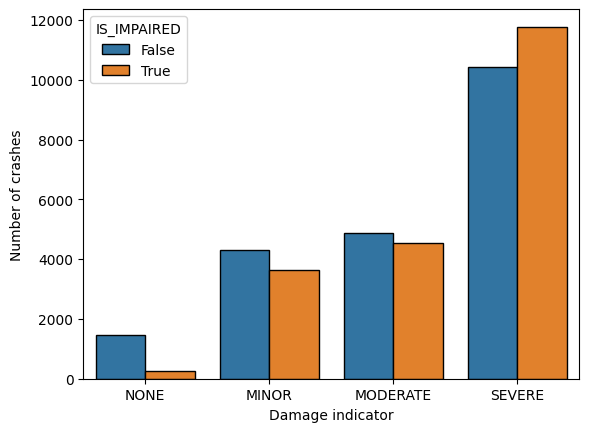

In [74]:
sb.barplot(correlation, x = "DAMAGE_IND", y = "COUNT", hue = "IS_IMPAIRED", edgecolor = "black")
plt.ylabel("Number of crashes")
plt.xlabel("Damage indicator")
plt.show()

Here we see that if a driver is impaired it is more likely that the vehicle will at least suffer minor injuries. However it seems that regardless of the impairedness of the drivers, the most severe damage is the highest among the crashes and that there are only slightly more crashes by the impaired drivers.

# Chi-square test for homogeneity for impairment vs unimpaired

We construct the null hypothesis

Hₐ: The distribution of vehicle damage between impairments is the same

Hᵦ: Hₐ is not true



To measure the correlation of impairment to the severity of vehicle crash. We will use Chi-square test of homogeneity. First we show the contingency table

In [75]:
contingency_table = pd.crosstab(combined_cleaned["IS_IMPAIRED"], combined_cleaned["DAMAGE_IND"])
contingency_table

DAMAGE_IND,MINOR,MODERATE,NONE,SEVERE
IS_IMPAIRED,,,,
False,4317,4880,1448,10417
True,3627,4543,259,11772


Then we find the expected values for each sub-categories if they are indeed homogenous under Hₐ

In [76]:
dmg_group = (
    correlation
    .groupby(["DAMAGE_IND"])
    .sum()
    .rename(columns = {"COUNT" : "DAMAGE_COUNT"})
    .reset_index()
)[["DAMAGE_IND", "DAMAGE_COUNT"]]

imp_group = (
    correlation
    .groupby(["IS_IMPAIRED"])
    .sum()
    .rename(columns = {"COUNT" : "IMPAIRED_COUNT"})
)

correlation2 = pd.merge(correlation, dmg_group, on = "DAMAGE_IND", how = "left")
correlation3 = pd.merge(correlation2, imp_group, on = "IS_IMPAIRED", how = "left").sort_values(["COUNT"])

total = sum(imp_group["IMPAIRED_COUNT"])
correlation3["EXPECTED"] = correlation3["DAMAGE_COUNT"] * correlation3["IMPAIRED_COUNT"] / total
correlation3

,DAMAGE_IND,IS_IMPAIRED,COUNT,DAMAGE_COUNT,IMPAIRED_COUNT,EXPECTED
0,NONE,True,259,1707,20201,835.690740
1,NONE,False,1448,1707,21062,871.309260
2,MINOR,True,3627,7944,20201,3889.119647
3,MINOR,False,4317,7944,21062,4054.880353
4,MODERATE,True,4543,9423,20201,4613.189128
5,MODERATE,False,4880,9423,21062,4809.810872
6,SEVERE,False,10417,22189,21062,11325.999515
7,SEVERE,True,11772,22189,20201,10863.000485


We then sum the squared difference of the count and expected divided by the expected. Under Hₐ this is a chi-square with degree of freedom 1

However, summing up 8 χ(1) will give χ(8), but as we have 4 by 2 categories and esimating the probabilities, we will lose out 5 degrees of freedom so we only get χ(3)

In [77]:
correlation4 = (
    correlation3
    .assign(IND_TEST_STATISTIC = lambda x: (x.COUNT - x.EXPECTED)**2 / x.EXPECTED)
)

Test_statistic = sum(correlation4["IND_TEST_STATISTIC"])
Test_statistic

965.3741280307119

In [78]:
p_value = 1 - stats.chi2.cdf(Test_statistic, df=3)
p_value

0.0

We have T ~ χ(3)

`p_value` = 𝒫(T > t) = 𝒫(χ(3) >`Test_statistic`) ≈ 0

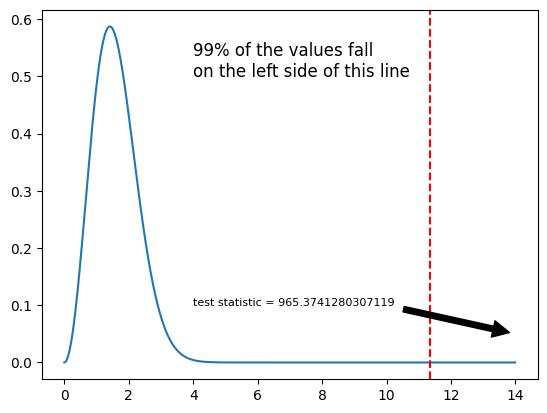

In [79]:
x = np.arange(0,14, 0.01)
pdf = chi.pdf(x, 3)
plt.plot(x, pdf)
plt.axvline(x=11.34, linestyle='--', color='red')
plt.annotate('99% of the values fall\non the left side of this line',xytext=(4, 0.5), xy = (4,0.5),
              fontsize=12)
txt = "test statistic = {test}".format(test = Test_statistic)
plt.annotate(txt, xytext=(4, 0.1), xy = (14, 0.05), arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize = 8)
plt.show()

We can see that the p_value is close to 0 so we reject Hₐ that the distribution of vehicle damage across impairment is the same at α = 0.01 significance level.

## Result for correlation of being impaired and vehicle damage

By the chi-square test, we can see that there is a statistical significant difference in the two distribution. And from the bar plot we can see that a crash when the driver is impaired will usually result in a more severe vehicle damage.